# Module 2

## Imports

In [349]:
import cv2
import glob
import imageio
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
import os, random
import pathlib
import pandas as pd
from PIL import Image
from scipy import ndimage, stats
import seaborn as sb
from skimage import color, feature, filters, measure
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from tqdm import tqdm

## Helpers

In [6]:
def determine_class(file_dir, classes):
    path = np.char.split(file_dir, sep ='\\')
    file_name = path.item(0)[-1]
    for i in range(0, len(classes)):
        if classes[i] in file_name:
            return i
    return -1

## Load Images

In [269]:
current_dir = os.getcwd()
data_dir = current_dir + '\\data_augmented'
image_files = np.array(glob.glob(data_dir + '/*.png'))

classes = np.array(['Necrosis', 'Stroma', 'Tumor'])

augmented_images_size = (224, 224, 3)
augmented_images = np.empty((0, augmented_images_size[0], augmented_images_size[1], augmented_images_size[2]), dtype=np.uint8)
augmented_labels = np.empty((0,), dtype=np.uint8)
augmented_images_files = np.empty((0, 1))

indices = np.array(np.random.randint(0, len(image_files), 100))

for current_image_file in tqdm(image_files[indices]):
    current_image = np.expand_dims(np.array(Image.open(current_image_file)).astype(np.uint8), axis=0)    
    current_image_label = determine_class(current_image_file, classes)

    augmented_images = np.append(augmented_images, current_image, axis=0)
    augmented_labels = np.append(augmented_labels, np.expand_dims(current_image_label, axis=0), axis=0)

    current_image_file = np.expand_dims(current_image_file, axis=0)
    augmented_images_files = np.append(augmented_images_files, np.expand_dims(current_image_file, axis=0), axis=0)
    
print()
print('Images:', augmented_images.shape)
print('Labels:', augmented_labels.shape)
print('Files:', augmented_images_files.shape)
print(augmented_images_files[0:np.min([augmented_images_files.shape[0], 10])])


Images: (100, 224, 224, 3)
Labels: (100,)
Files: (100, 1)
[['C:\\Users\\alexa\\Documents\\GitHub\\TCGA-kidney\\data_augmented\\Stroma_8564.png']
 ['C:\\Users\\alexa\\Documents\\GitHub\\TCGA-kidney\\data_augmented\\Necrosis_0725.png']
 ['C:\\Users\\alexa\\Documents\\GitHub\\TCGA-kidney\\data_augmented\\Tumor_0521.png']
 ['C:\\Users\\alexa\\Documents\\GitHub\\TCGA-kidney\\data_augmented\\Tumor_4881.png']
 ['C:\\Users\\alexa\\Documents\\GitHub\\TCGA-kidney\\data_augmented\\Necrosis_4778.png']
 ['C:\\Users\\alexa\\Documents\\GitHub\\TCGA-kidney\\data_augmented\\Stroma_5418.png']
 ['C:\\Users\\alexa\\Documents\\GitHub\\TCGA-kidney\\data_augmented\\Necrosis_4308.png']
 ['C:\\Users\\alexa\\Documents\\GitHub\\TCGA-kidney\\data_augmented\\Necrosis_5349.png']
 ['C:\\Users\\alexa\\Documents\\GitHub\\TCGA-kidney\\data_augmented\\Tumor_8508.png']
 ['C:\\Users\\alexa\\Documents\\GitHub\\TCGA-kidney\\data_augmented\\Stroma_7864.png']]


In [270]:
# i = 1
# print('Labels:', augmented_labels[i])
# print('Files:', augmented_images_files[i])

# fig = plt.figure()
# plt.xticks([])
# plt.yticks([])
# plt.grid(False)
# plt.title('augmented_images['+str(i)+']')
# plt.imshow(cv2.cvtColor(augmented_images[i], cv2.COLOR_BGR2RGB))

print(classes)
print(np.unique(augmented_labels, return_counts=True))

['Necrosis' 'Stroma' 'Tumor']
(array([0, 1, 2]), array([45, 19, 36], dtype=int64))


## Feature Extractors

### Color

In [318]:
def extract_rgb(image):
    r, g, b = cv2.split(image)
    
#     norm_r = normalize(r, norm='l2')
#     norm_g = normalize(g, norm='l2')
#     norm_b = normalize(b, norm='l2')

    if view_plots:
        fig = plt.figure()
        plt.subplot(1, 3, 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))
        plt.xlabel('R')
        plt.subplot(1, 3, 2)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))
        plt.xlabel('G')
        plt.subplot(1, 3, 3)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))
        plt.xlabel('B')    
    
    rr = stats.describe(r.flatten())
    gg = stats.describe(g.flatten())
    bb = stats.describe(b.flatten())
    
    return np.array([rr.minmax[0], rr.minmax[1], rr.mean, rr.variance, rr.skewness, rr.kurtosis, gg.minmax[0], gg.minmax[1], gg.mean, gg.variance, gg.skewness, gg.kurtosis, bb.minmax[0], bb.minmax[1], bb.mean, bb.variance, bb.skewness, bb.kurtosis], dtype=np.float32), r, g, b
#     return np.array([np.mean(r), np.mean(g), np.mean(b), np.std(r), np.std(g), np.std(b)], dtype=np.float32), r, g, b

In [319]:
def extract_hsv(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(image)
    
#     norm_h = normalize(h, norm='l2')
#     norm_s = normalize(s, norm='l2')
#     norm_v = normalize(v, norm='l2')

    if view_plots:
        fig = plt.figure()
        plt.subplot(1, 3, 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(h, cv2.COLOR_BGR2RGB))
        plt.xlabel('H')
        plt.subplot(1, 3, 2)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(s, cv2.COLOR_BGR2RGB))
        plt.xlabel('S')
        plt.subplot(1, 3, 3)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
        plt.xlabel('V')
    
    hh = stats.describe(h.flatten())
    ss = stats.describe(s.flatten())
    vv = stats.describe(v.flatten())
    
    return np.array([hh.minmax[0], hh.minmax[1], hh.mean, hh.variance, hh.skewness, hh.kurtosis, ss.minmax[0], ss.minmax[1], ss.mean, ss.variance, ss.skewness, ss.kurtosis, vv.minmax[0], vv.minmax[1], vv.mean, vv.variance, vv.skewness, vv.kurtosis], dtype=np.float32), h, s, v
#     return np.array([np.mean(h), np.mean(s), np.mean(v), np.std(h), np.std(s), np.std(v)], dtype=np.float32), h, s, v

In [320]:
def extract_lab(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(image)
    
#     norm_l = normalize(l, norm='l2')
#     norm_a = normalize(a, norm='l2')
#     norm_b = normalize(b, norm='l2')

    if view_plots:
        fig = plt.figure()
        plt.subplot(1, 3, 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(l, cv2.COLOR_BGR2RGB))
        plt.xlabel('L')
        plt.subplot(1, 3, 2)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))
        plt.xlabel('A')
        plt.subplot(1, 3, 3)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))
        plt.xlabel('B')
    
    ll = stats.describe(l.flatten())
    aa = stats.describe(a.flatten())
    bb = stats.describe(b.flatten())
    
    return np.array([ll.minmax[0], ll.minmax[1], ll.mean, ll.variance, ll.skewness, ll.kurtosis, aa.minmax[0], aa.minmax[1], aa.mean, aa.variance, aa.skewness, aa.kurtosis, bb.minmax[0], bb.minmax[1], bb.mean, bb.variance, bb.skewness, bb.kurtosis], dtype=np.float32), h, s, v
#     return np.array([np.mean(l), np.mean(a), np.mean(b), np.std(l), np.std(a), np.std(b)], dtype=np.float32), l, a, b

### Texture

In [141]:
def extract_glcm(image):
    offset = [1] #pixel
    directions = np.asarray([np.pi*i/4 for i in range(0, 8)]) #radian angles

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = feature.greycomatrix(image, distances=offset, angles=directions).astype(np.uint8)
    
    contrast = feature.greycoprops(glcm, prop='contrast')
    homogeneity = feature.greycoprops(glcm, prop='homogeneity')
    energy = feature.greycoprops(glcm, prop='energy')
    correlation = feature.greycoprops(glcm, prop='correlation')
    
#     norm_contrast = normalize(contrast, norm='l2')
#     norm_homogeneity = normalize(homogeneity, norm='l2')
#     norm_energy = normalize(energy, norm='l2')
#     norm_correlation = normalize(correlation, norm='l2')
    
    return np.array([np.mean(contrast), np.mean(homogeneity), np.mean(energy), np.mean(correlation), np.std(contrast), np.std(homogeneity), np.std(energy), np.std(correlation)], dtype=np.float32)

In [234]:
def extract_entropy(image):
    return np.array([measure.shannon_entropy(image)])

In [131]:
def extract_hysteresis(image):   
    edges = filters.sobel(image)*255
    edges = edges.astype(np.uint8)
        
    low = 0.1*255
    high = 0.35*255
    
    lowt = (edges > low).astype(np.uint8)*255
    hight = (edges > high).astype(np.uint8)*255
    hyst = filters.apply_hysteresis_threshold(edges, low, high).astype(np.uint8)*255
    
    if view_plots:
        fig = plt.figure()
        plt.subplot(1, 4, 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.xlabel('Original')
        plt.subplot(1, 4, 2)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
        plt.xlabel('Sobel')
        plt.subplot(1, 4, 3)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(lowt, cv2.COLOR_BGR2RGB))
        plt.xlabel('Low')
        plt.subplot(1, 4, 4)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(hight + hyst, cv2.COLOR_BGR2RGB))
        plt.xlabel('Hysteresis')

In [205]:
def extract_snr(image, axis=None, ddof=0):
    a = np.asanyarray(image)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.array([np.where(sd == 0, 0, m/sd)])

### Morphological

In [201]:
#return mse of vertical and horizontal symmetry

def extract_symmetry(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_flip_vertical = image[::-1, :]
    image_flip_horizontal = image[:, ::-1]
    
    mse_vertical = np.sum(np.power(image - image_flip_vertical, 2)) / (image.shape[0] * image.shape[1])
    mse_horizontal = np.sum(np.power(image - image_flip_horizontal, 2)) / (image.shape[0] * image.shape[1])
    
    if view_plots:
        fig = plt.figure()
        plt.subplot(1, 2, 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(image_flip_vertical, cv2.COLOR_BGR2RGB))
        plt.xlabel('Flip Vertical')
        plt.subplot(1, 2, 2)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(image_flip_horizontal, cv2.COLOR_BGR2RGB))
        plt.xlabel('Flip Horizontal')
    
    return mse_vertical, mse_horizontal

In [230]:
def extract_centerofmass(image):
    return ndimage.measurements.center_of_mass(image) #(row, column, depth)

In [359]:
# nuclear segmentation
# shae, texture, 
# gray level morphology
# hysterisis thresholding

## Extract Features

In [263]:
view_plots = False

In [324]:
num_features = 18 + 18 + 18 + 8 + 1 + 2 + 1 + 3 #D

data_features = np.empty((0, num_features), dtype=np.float32) #NxD
data_labels = np.empty((0,), dtype=np.uint8) #1xD

for i in tqdm(range(0, augmented_images.shape[0])):
#     fig = plt.figure(figsize=(2, 2))
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.title('augmented_images['+str(i)+']')
#     plt.imshow(cv2.cvtColor(augmented_images[i], cv2.COLOR_BGR2RGB))

    current_data_features = np.array([], dtype=np.float32)

    out = extract_rgb(augmented_images[i])
    current_data_features = np.append(current_data_features, out[0], axis=0)
    # r = out[1]
    # g = out[2]
    # b = out[3]

    out = extract_hsv(augmented_images[i])
    current_data_features = np.append(current_data_features, out[0], axis=0)
    # h = out[1]
    # s = out[2]
    # v = out[3]

    out = extract_lab(augmented_images[i])
    current_data_features = np.append(current_data_features, out[0], axis=0)
    # l = out[1]
    # a = out[2]
    # bb = out[3]

    out = extract_glcm(augmented_images[i])
    current_data_features = np.append(current_data_features, out, axis=0)
    
    out = extract_entropy(augmented_images[i])
    current_data_features = np.append(current_data_features, out, axis=0)
    
    out = extract_symmetry(augmented_images[i])
    current_data_features = np.append(current_data_features, out, axis=0)

    out = extract_snr(augmented_images[i])
    current_data_features = np.append(current_data_features, out, axis=0)

    out = extract_centerofmass(augmented_images[i])
    current_data_features = np.append(current_data_features, out, axis=0)
    
    data_features = np.append(data_features, np.expand_dims(current_data_features, axis=0), axis=0)
    data_labels = np.append(data_labels, np.expand_dims(augmented_labels[i], axis=0), axis=0)

print('Data Features:', data_features.shape)
print('Data Labels:', data_labels.shape)

Data Features: (100, 69)
Data Labels: (100,)


[ 0.00000000e+00  2.38000000e+02  2.05416336e+02  1.30310388e+03
 -2.88858271e+00  9.85478401e+00  0.00000000e+00  2.22000000e+02
  1.84686066e+02  1.81922717e+03 -2.00797892e+00  3.86642504e+00
  4.40000000e+01  2.36000000e+02  2.06948364e+02  7.98580688e+02
 -2.43266463e+00  6.62039852e+00  0.00000000e+00  1.79000000e+02
  1.48424301e+02  1.37734055e+02 -8.09814358e+00  1.01460442e+02
  8.00000000e+00  2.55000000e+02  3.42111549e+01  1.24894751e+03
  3.22586870e+00  1.29716167e+01  4.50000000e+01  2.38000000e+02
  2.08916321e+02  7.82339355e+02 -2.43916130e+00  6.70281601e+00
  1.20000000e+01  2.28000000e+02  1.97303955e+02  1.33905493e+03
 -2.19037533e+00  4.98668957e+00  1.26000000e+02  1.68000000e+02
  1.39782761e+02  6.20341225e+01  1.42749190e+00  8.61715972e-01
  8.90000000e+01  1.73000000e+02  1.20597977e+02  2.58453484e+01
 -1.65282004e-02  1.11536589e+01  1.74719238e+02  1.77054971e-01
  3.67926881e-02  9.53183413e-01  5.47419624e+01  2.33521163e-02
  2.28217267e-03  1.46240

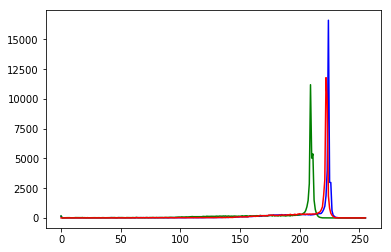

In [323]:
i = 0
data = data_features[i]
print(data)
current_image = np.expand_dims(np.array(Image.open(augmented_images_files[i][0])).astype(np.uint8), axis=0)[0]

b = cv2.calcHist([current_image[:, :, 0]], [0], None, [256], [0, 256])
g = cv2.calcHist([current_image[:, :, 1]], [0], None, [256], [0, 256])
r = cv2.calcHist([current_image[:, :, 2]], [0], None, [256], [0, 256])

# show the plotting graph of an image
plt.plot(b, 'b')
plt.plot(g, 'g')
plt.plot(r, 'r')
plt.show() 

### Plot Features

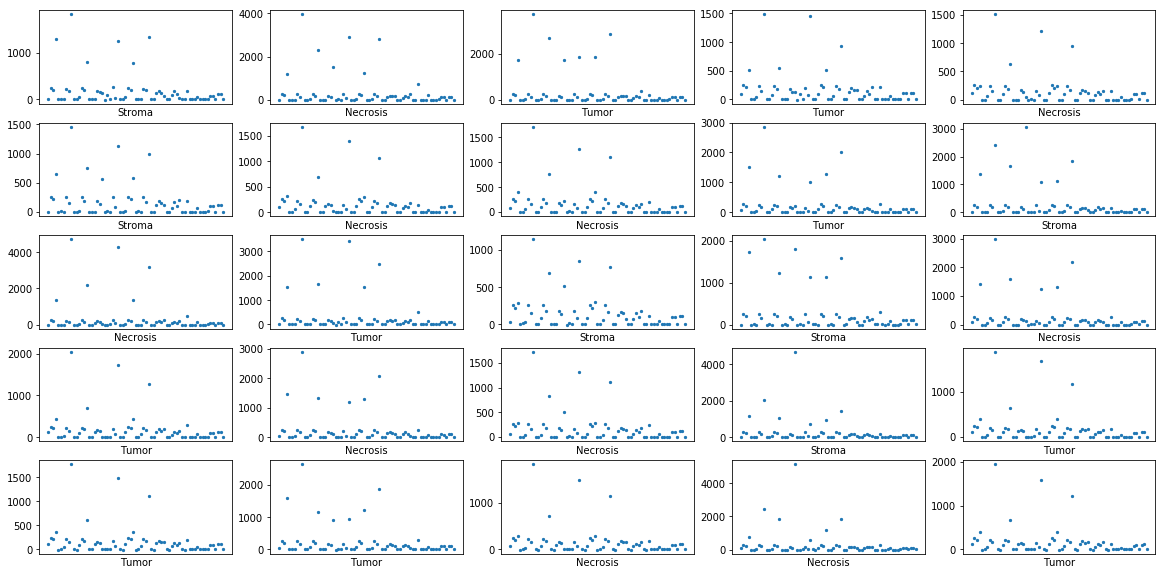

In [325]:
grid = (5, 5)

ax = plt.figure(figsize=(20, 10))

for i in tqdm(range(0, np.min([data_features.shape[0], grid[0]*grid[1]]))):
    plt.subplot(grid[0], grid[1], i+1)
    plt.xticks([])
#     plt.yticks([])
    plt.grid(False)
    plt.scatter(range(0, num_features), data_features[i, :], s=5)
    plt.xlabel(classes[data_labels[i]])

## Principal Component Analysis (PCA)

In [331]:
current_dir = os.getcwd()
save_dir = current_dir + '\\Module2'
print(save_dir)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

C:\Users\alexa\Documents\GitHub\TCGA-kidney\Module2


4 components needed to explain 80.00% of variance
6 components needed to explain 85.00% of variance
9 components needed to explain 90.00% of variance
14 components needed to explain 95.00% of variance
21 components needed to explain 98.00% of variance
26 components needed to explain 99.00% of variance
43 components needed to explain 99.90% of variance


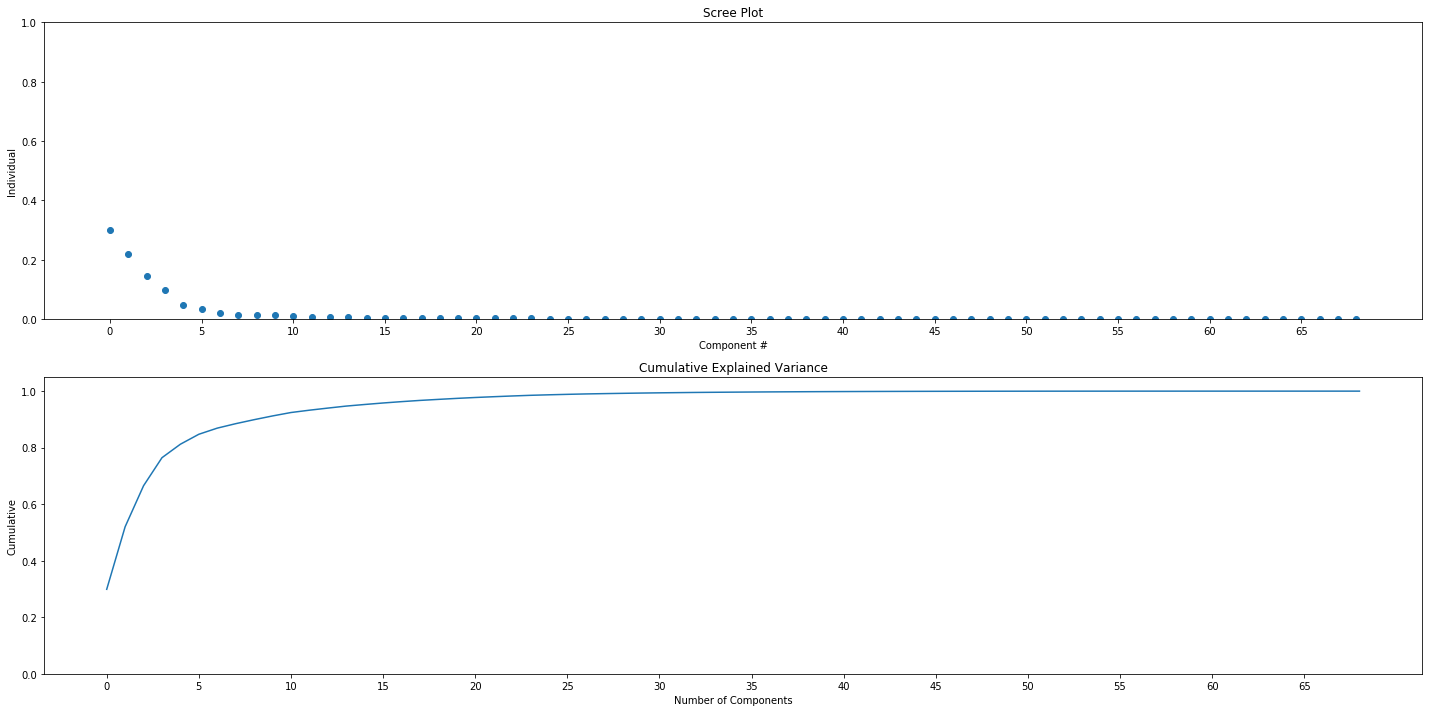

In [334]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

num_features = data_features.shape[1] #use top D features for testing, in the end this will be all
desired_explained_variance = [0.80, 0.85, .90, .95, .98, .99, .999]
filename = save_dir + '\\pca_'+'f{:03d}'.format(num_features)

#----

scaler = MinMaxScaler(feature_range=[0, 1]) #scale data to [0, 1] range
X_scaler = scaler.fit_transform(data_features)
pca = PCA()
pca.fit(X_scaler)

explained_variance = pca.explained_variance_ratio_
components = pca.components_

fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

ax1 = plt.subplot(2, 1, 1)
plt.xticks(np.arange(0, num_features, (1 if num_features < 10 else 5)))
plt.ylim(0, 1)
plt.xlabel('Component #')
plt.ylabel('Individual')
plt.title('Scree Plot')
plt.scatter(np.arange(0, num_features), explained_variance)

ax2 = plt.subplot(2, 1, 2)
plt.xticks(np.arange(0, num_features, (1 if num_features < 10 else 5)))
plt.ylim(0, 1.05)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative')
plt.title('Cumulative Explained Variance')
plt.plot(np.cumsum(explained_variance))

plt.tight_layout()

file = open(filename + '.txt', 'w')
for desired in desired_explained_variance:
    num_features_needed = np.where((np.cumsum(explained_variance) > desired) == 1)[0][0]
    line = '%d components needed to explain %.2f%% of variance' % (num_features_needed, desired*100)
    print(line)
    file.write(line + '\n')
file.close()

fig.savefig(filename + '.png')

In [344]:
desired_variance = 0.99

scaler = MinMaxScaler(feature_range=[0, 1])
X_scaler = scaler.fit_transform(data_features)

#NOTE - uncomment 1 per run
pca = PCA(desired_variance)
# pca = PCA(n_components=2)
# pca = PCA(n_components=3)

pca.fit(X_scaler)
Xpca = pca.transform(X_scaler)

components = pca.components_

print(data_features.shape)
print(X_scaler.shape)
print(Xpca.shape)
print('Explained Variance Components:', pca.explained_variance_ratio_)
print('Desired Variance:', desired_variance)
print('Explained Variance:', np.sum(pca.explained_variance_ratio_))

filename = save_dir + '\\Xpca_f{:03d}'.format(pca.n_features_)+'_c{:03d}'.format(pca.n_components_)+'_v{:04d}'.format(int(np.sum(pca.explained_variance_ratio_)*10000))
print(filename)
np.save(filename + '.npy', Xpca)

(100, 69)
(100, 69)
(100, 27)
Explained Variance Components: [0.29892841 0.22128963 0.14510291 0.09923054 0.04768421 0.03517902
 0.02168332 0.01575473 0.01413981 0.01323142 0.01209896 0.00823267
 0.00743066 0.00713139 0.00563275 0.005306   0.00475505 0.00433604
 0.00366601 0.00352457 0.00315018 0.00276127 0.00258894 0.0023599
 0.00181248 0.00162468 0.00144615]
Desired Variance: 0.99
Explained Variance: 0.9900817244755081
C:\Users\alexa\Documents\GitHub\TCGA-kidney\Module2\Xpca_f069_c027_v9900


Class Count: 45, 19, 36


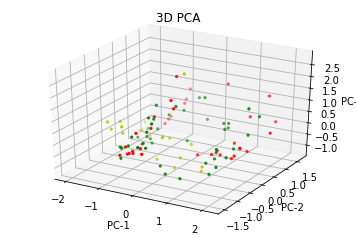

In [343]:
from mpl_toolkits.mplot3d import Axes3D

if Xpca.shape[1] == 2:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    class1 = np.where(augmented_labels == 0) #Necrosis
    class2 = np.where(augmented_labels == 1) #Stroma
    class3 = np.where(augmented_labels == 2) #Tumor
    
    print('Class Count: %d, %d, %d' % (len(class1[0]), len(class2[0]), len(class3[0])))
    
    ax.scatter(Xpca[class1, 0], Xpca[class1, 1], marker='.', color='g')
    ax.scatter(Xpca[class2, 0], Xpca[class2, 1], marker='.', color='y')
    ax.scatter(Xpca[class3, 0], Xpca[class3, 1], marker='.', color='r')

    ax.set_xlabel('PC-1')
    ax.set_ylabel('PC-2')
    ax.set_title('2D PCA')
    plt.show()
    
    fig.savefig(save_dir + '\\2D.png')

elif Xpca.shape[1] == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
        
    class1 = np.where(augmented_labels == 0) #Necrosis
    class2 = np.where(augmented_labels == 1) #Stroma
    class3 = np.where(augmented_labels == 2) #Tumor
    
    print('Class Count: %d, %d, %d' % (len(class1[0]), len(class2[0]), len(class3[0])))
    
    ax.scatter(Xpca[class1, 0], Xpca[class1, 1], Xpca[class1, 2], marker='.', color='g')
    ax.scatter(Xpca[class2, 0], Xpca[class2, 1], Xpca[class2, 2], marker='.', color='y')
    ax.scatter(Xpca[class3, 0], Xpca[class3, 1], Xpca[class3, 2], marker='.', color='r')

    ax.set_xlabel('PC-1')
    ax.set_ylabel('PC-2')
    ax.set_zlabel('PC-3')
    ax.set_title('3D PCA')
    plt.show()
    
    fig.savefig(save_dir + '\\3D.png')

## Correlation Matrix

In [357]:
pca_df = pd.DataFrame.from_records(data_features)

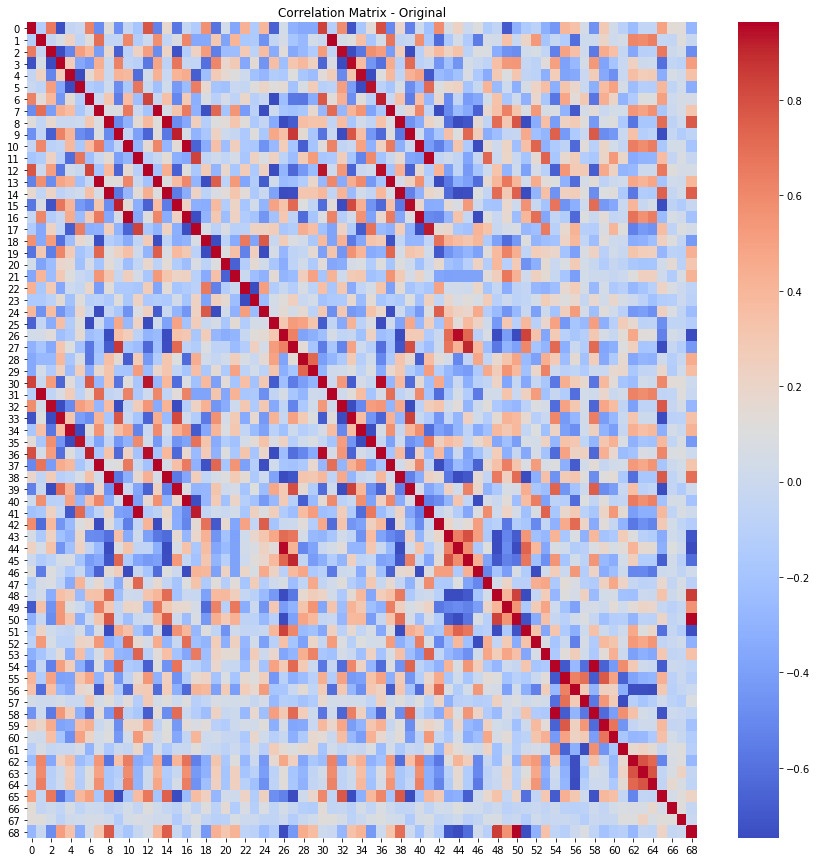

In [358]:
correlation = pca_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sb.heatmap(correlation, ax=ax, cmap='coolwarm', robust=True, cbar=True)
plt.title('Correlation Matrix - Original')
plt.show()

fig.savefig(save_dir + '\\correlation_original.png')

In [355]:
pca_df = pd.DataFrame.from_records(Xpca)

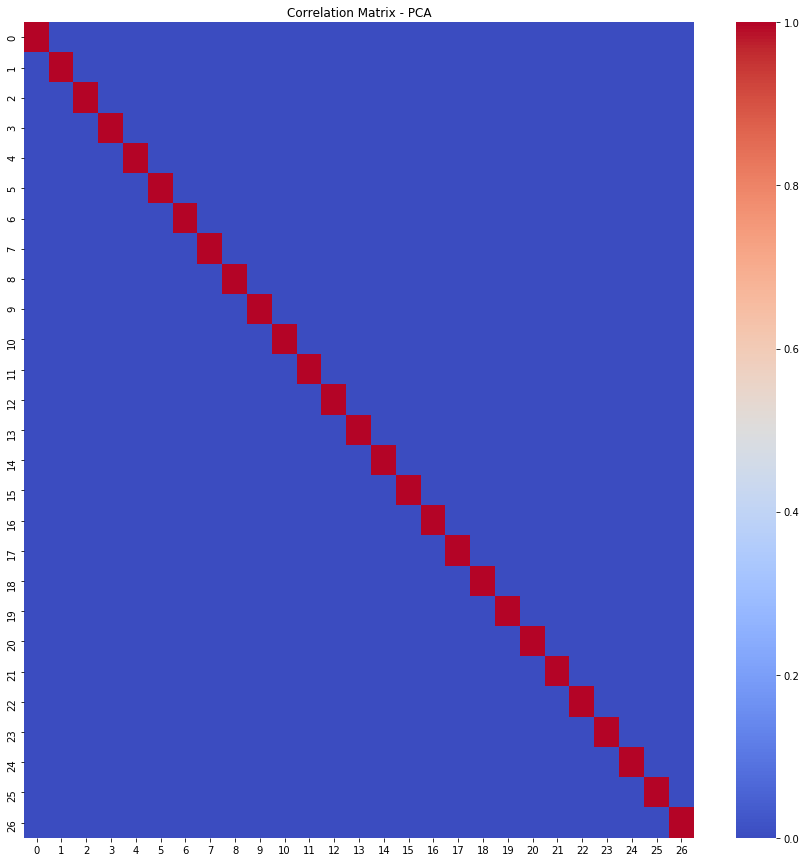

In [356]:
correlation = pca_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sb.heatmap(correlation, ax=ax, cmap='coolwarm', robust=True, cbar=True)
plt.title('Correlation Matrix - PCA')
plt.show()

fig.savefig(save_dir + '\\correlation_pca.png')

## Minimum Redundancy Maximum Relevance (MRMR)

150


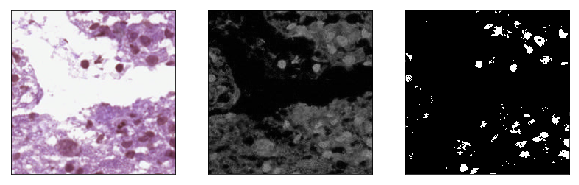

In [97]:
#mask

print(np.max(s))
s_mask = (s > 100).astype(np.uint8)*255

fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(cv2.cvtColor(augmented_images[i], cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(cv2.cvtColor(s, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(cv2.cvtColor(s_mask, cv2.COLOR_BGR2RGB))

In [96]:
img = cv2.imread(augmented_images_files[i][0])
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 6
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv2.imshow('res2',res2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [136]:
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

image = np.expand_dims(np.array(Image.open(augmented_images_files[i][0])).astype(np.uint8), axis=0)  

distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

RuntimeError: sequence argument must have length equal to input rank

In [44]:
# # # image = Image.open(image_files[1])
# # pil_image = Image.open(image_files[1]).convert('RGB') 
# # open_cv_image = np.array(pil_image) 
# # # Convert RGB to BGR 
# # open_cv_image = open_cv_image[:, :, ::-1].copy() 

# print(image_files[1])
# img = cv2.imread(image_files[1], 0)
# current_image = np.expand_dims(np.array(Image.open(augmented_images_files[1]).astype(np.uint8), axis=0))
# out = extract_hsv(current_image)
# current_data_features = np.append(current_data_features, out[0][0:6], axis=0)
# s = out[2]
# vis2 = cv2.cvtColor(s, cv2.COLOR_GRAY2BGR)
# cv2.imshow('s', vis2)


# # img = cv2.imread('balls.jfif',0)

# img = cv2.medianBlur(img,5)
# print(img.shape)
# cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

# circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,100, param1=75,param2=40,minRadius=0,maxRadius=0)
# circles = np.uint16(np.around(circles))

# print(circles.shape)
# for i in circles[0,:]:
#     # draw the outer circle
#     cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
#     # draw the center of the circle
#     cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

# cv2.imshow('detected circles',cimg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [27]:
# print(data_features)

In [6]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import random as rng
rng.seed(12345)
def thresh_callback(val):
    threshold = val
    
    canny_output = cv.Canny(src_h, threshold, threshold * 2)
    
    
    contours, hierarchy = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    # Find the rotated rectangles and ellipses for each contour
    minRect = [None]*len(contours)
    minEllipse = [None]*len(contours)
    for i, c in enumerate(contours):
        minRect[i] = cv.minAreaRect(c)
        if c.shape[0] > 5:
            minEllipse[i] = cv.fitEllipse(c)
    # Draw contours + rotated rects + ellipses
    
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    
    for i, c in enumerate(contours):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        # contour
        cv.drawContours(drawing, contours, i, color)
        # ellipse
        if c.shape[0] > 5:
            cv.ellipse(drawing, minEllipse[i], color, 2)
        # rotated rectangle
        box = cv.boxPoints(minRect[i])
        box = np.intp(box) #np.intp: Integer used for indexing (same as C ssize_t; normally either int32 or int64)
        cv.drawContours(drawing, [box], 0, color)
    
    
    cv.imshow('Contours', drawing)

C:\Users\alexa\Documents\GitHub\TCGA-kidney\data_original\Necrosis\Necrosis_35.png
(512, 512, 3)


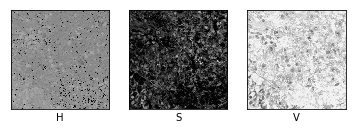

In [7]:
data_dir = current_dir + '\\data_augmented'
image_file = glob.glob(data_dir + '/*.png')[29]
print(image_file)

src = np.array(Image.open(image_file)).astype(np.uint8)
stuff = extract_hsv(src)

# Convert image to gray and blur it
# src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
# src_gray = cv.blur(src_gray, (3,3))
src_h = stuff[0]
print(src.shape)

# source_window = 'Source'
# cv.namedWindow(source_window)
# cv.imshow(source_window, src)
# max_thresh = 255
# thresh = 100 # initial threshold
# cv.createTrackbar('Canny Thresh:', source_window, thresh, max_thresh, thresh_callback)
# thresh_callback(thresh)
# cv.waitKey()